# Car price prediction using Python

In [6]:
from sklearn import linear_model, metrics
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Collect Training Data

In [7]:
# https://www.cars.com/research/compare/
#                    MPG , HP,   Rating,  Price
data_set = np.array([[30,  138,  4.7,     15220],  # Sonic
                     [32,  120,  4.7,     15455],  # Fiesta
                     [30,  109,  4.2,     12855],  # Versa
                     [31,  138,  4.8,     15015],  # Rio
                     [31,  158,  4.7,     19515],  # Civic
                     [31,  145,  4.4,     18085],  # Elantra
                     [31,  132,  4.5,     18185],  # Corolla
                     [29,  138,  4.8,     16995],  # Cruze
                     [25,  175,  4.9,     23485],  # Fussion
                     [27,  185,  4.8,     23080],  # Accord
                     [31,  182,  4.8,     23365],  # Altima
                     [28,  178,  4.6,     23955],  # Camry
                     [31,  184,  4.7,     22330],  # Mazda 6
                     [23,  292,  4.8,     29090],  # Charger
                     [24,  268,  4.9,     33535],  # Avalon
                     [23,  292,  4.7,     33355],  # 300
                     [22,  293,  4.6,     33840],]) # Cadenza

data_set_elements_count = data_set.shape[0]
features = data_set[0:data_set_elements_count, 0:3]
prices = data_set[0:data_set_elements_count, 3]

### Let's see how the data is looking:

In [8]:
features[0:5]

array([[  30. ,  138. ,    4.7],
       [  32. ,  120. ,    4.7],
       [  30. ,  109. ,    4.2],
       [  31. ,  138. ,    4.8],
       [  31. ,  158. ,    4.7]])

In [9]:
prices[0:5]

array([ 15220.,  15455.,  12855.,  15015.,  19515.])

## Step 2: Train Model

In [10]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(features, prices)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3: Evaluate Model

In [11]:
# Just a helper function to predict and evaluate the results
def predict_and_plot(model, test_set, plot_title):

    # Let's turn the data into something more readable    
    test_set_elements_count = test_set.shape[0]
    test_features = np.float64(test_set[0:test_set_elements_count, 0:3])
    real_prices = np.float64(test_set[0:test_set_elements_count, 3])
    car_names = test_set[0:test_set_elements_count, 4]
    
    # Do the prediction
    predicted_prices = model.predict(test_features)

    # Compare the predicted price vs the real price using a graph
    x_ind = np.arange(test_set_elements_count)
    fig = plt.figure()
    plt.scatter(x_ind, predicted_prices,   label="predicted price")
    plt.scatter(x_ind, real_prices,  label="real price")
    plt.xticks(x_ind, car_names, rotation='vertical')
    plt.legend(loc='best')
    fig.suptitle(plot_title, fontsize=20)
    plt.show()
    
    # Get the regression score
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
    print ("R^2 Regression score:", metrics.r2_score(real_prices, predicted_prices))

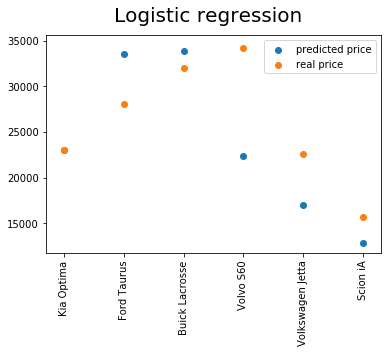

R^2 Regression score: 0.0897519763234


In [12]:
# https://www.cars.com/research/compare/?acodes=USC60KIC052A0,USC60FOC071A0,USC60BUC081A0
#                     MPG, HP,   Rating,  Price,  Name
test_set = np.array([[28,  185,  4.9,     22990,  "Kia Optima"],
                     [21,  240,  4.8,     28095,  "Ford Taurus"],
                     [23,  304,  4.3,     31990,  "Buick Lacrosse"],
                     [30,  240,  5.0,     34150,  "Volvo S60"],
                     [28,  150,  4.9,     22610,  "Volkswagen Jetta"],
                     [35,  106,  4.0,     15700,  "Scion iA"],])

predict_and_plot(logistic_regression_model, test_set, "Logistic regression")


## Repeat 2 and 3: Train a model and re-evaluate 

In [13]:
passive_aggressive_model = linear_model.PassiveAggressiveRegressor() # Must be a Seattle thing.
passive_aggressive_model.fit(features, prices)

PassiveAggressiveRegressor(C=1.0, epsilon=0.1, fit_intercept=True,
              loss='epsilon_insensitive', n_iter=5, random_state=None,
              shuffle=True, verbose=0, warm_start=False)

In [14]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(features, prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Let's compare the three models side by side

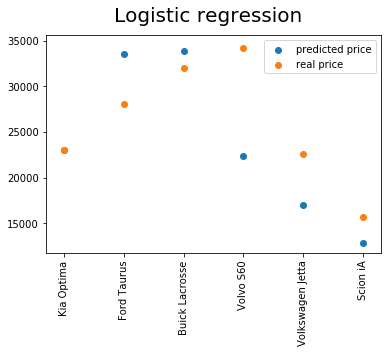

R^2 Regression score: 0.0897519763234


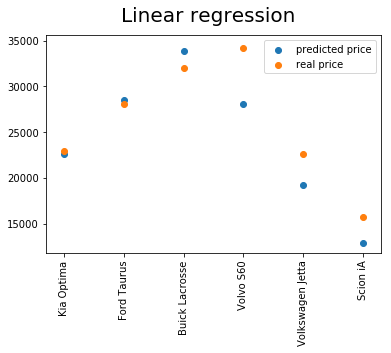

R^2 Regression score: 0.739152647139


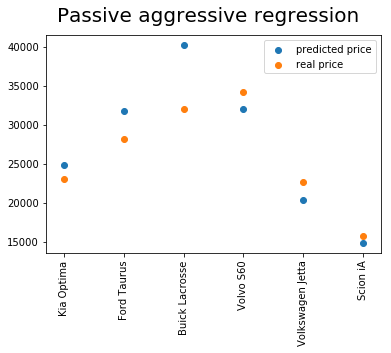

R^2 Regression score: 0.596321586573


In [15]:
predict_and_plot(logistic_regression_model, test_set, "Logistic regression")
predict_and_plot(linear_regression_model, test_set, "Linear regression")
predict_and_plot(passive_aggressive_model, test_set, "Passive aggressive regression")

# Step 4: Predict new data

# How much would this monstrosity cost? 
![title](https://tstoaddicts.files.wordpress.com/2015/03/thehomer.png)

In [16]:
print ("Predicted price:", linear_regression_model.predict([[11,  510,  1.0]])[0])

Predicted price: 50236.2236393
